In [1]:
import scvelo as scv
scv.settings.verbosity = 0
dataset = '../data/BoneHuman/adata.h5ad'
label = 'clusters'
exp_metrics = {}

In [2]:
import unitvelo as utv

(Running UniTVelo 0.1.dev1+g1881f6e)
2022-03-27 02:39:04


In [3]:
cluster_edges = [
    ("HSC_1", "Ery_1"), 
    ("HSC_1", "HSC_2"), 
    ("Ery_1", "Ery_2")]

## scVelo stochastic

  0%|          | 0.00/162M [00:00<?, ?B/s]

  0%|          | 0/5780 [00:00<?, ?cells/s]

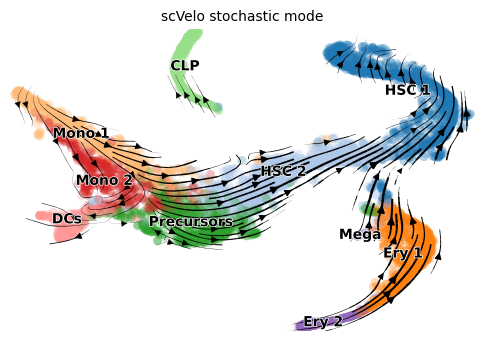

In [4]:
title = 'scVelo stochastic mode'
adata = scv.datasets.bonemarrow()
adata.uns['datapath'] = dataset
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

scv.tl.velocity(adata, mode='stochastic')

scv.tl.velocity_graph(adata)
adata.uns['clusters_colors'] = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5']
scv.pl.velocity_embedding_stream(adata, color=label, dpi=100, title=title)

In [6]:
adata

AnnData object with n_obs × n_vars = 5780 × 2000
    obs: 'clusters', 'palantir_pseudotime', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_colors', 'datapath', 'pca', 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_tsne', 'X_pca', 'velocity_tsne'
    varm: 'PCs'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

In [7]:
scv.pp.neighbors(adata)
adata_velo = adata[:, adata.var.loc[adata.var['velocity_genes'] == True].index]
exp_metrics["model_dyn"] = utv.evaluate(adata_velo, cluster_edges, label, 'velocity', 'X_tsne')

# Cross-Boundary Direction Correctness (A->B)
{('HSC_1', 'Ery_1'): -0.8610344021621074, ('HSC_1', 'HSC_2'): -0.6894453298758585, ('Ery_1', 'Ery_2'): -0.9029748019500254}
Total Mean: -0.8178181779959971
# In-cluster Coherence
{'CLP': 0.9074381, 'DCs': 0.9658171, 'Ery_1': 0.9692909, 'Ery_2': 0.9902824, 'HSC_1': 0.85452265, 'HSC_2': 0.9181577, 'Mega': 0.9639771, 'Mono_1': 0.9242185, 'Mono_2': 0.93995243, 'Precursors': 0.9324791}
Total Mean: 0.9366135597229004


## scVelo dynamic

  0%|          | 0/558 [00:00<?, ?gene/s]

  0%|          | 0/5780 [00:00<?, ?cells/s]

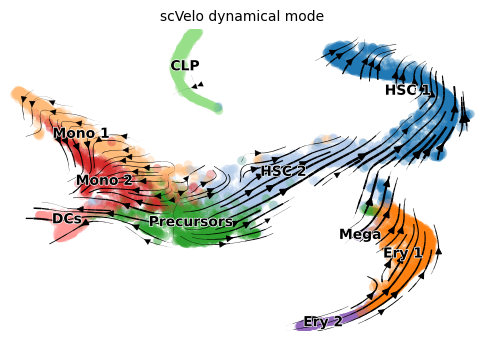

In [8]:
title = 'scVelo dynamical mode'
adata = scv.datasets.bonemarrow()
adata.uns['datapath'] = dataset
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

scv.tl.recover_dynamics(adata, n_jobs=20)
scv.tl.velocity(adata, mode='dynamical')

scv.tl.velocity_graph(adata)
adata.uns['clusters_colors'] = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5']
scv.pl.velocity_embedding_stream(adata, color=label, dpi=100, title=title)

In [9]:
scv.pp.neighbors(adata)
adata_velo = adata[:, adata.var.loc[adata.var['velocity_genes'] == True].index]
exp_metrics["model_dyn"] = utv.evaluate(adata_velo, cluster_edges, label, 'velocity', 'X_tsne')

# Cross-Boundary Direction Correctness (A->B)
{('HSC_1', 'Ery_1'): -0.8767161904580902, ('HSC_1', 'HSC_2'): -0.7406097536917645, ('Ery_1', 'Ery_2'): -0.9011676612630122}
Total Mean: -0.8394978684709556
# In-cluster Coherence
{'CLP': 0.8011706364672638, 'DCs': 0.8831685428853896, 'Ery_1': 0.968510822837128, 'Ery_2': 0.9811672009214301, 'HSC_1': 0.93928965140427, 'HSC_2': 0.9335215285774672, 'Mega': 0.9773211685600964, 'Mono_1': 0.9071636866829598, 'Mono_2': 0.9244984234425947, 'Precursors': 0.8666819017376352}
Total Mean: 0.9182493563516235


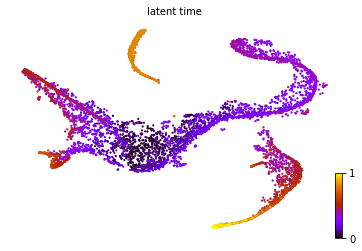

In [10]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=20)

## UniTVelo

In [4]:
velo_config = utv.config.Configuration()
velo_config.OFFSET_GENES = True
velo_config.R2_ADJUST = False
velo_config.IROOT = 'HSC_1'
velo_config.FIT_OPTION = '1'

-------> Model Configuration Settings <-------

 GPU: 2	FIG_DIR: ./figures/	BASE_FUNCTION: Gaussian	
 GENERAL: Curve	BASIS: None	N_TOP_GENES: 2000	
 OFFSET_GENES: True	FILTER_CELLS: False	EXAMINE_GENE: False	
 RESCALE_TIME: False	RESCALE_DATA: True	R2_ADJUST: False	
 IROOT: HSC_1	NUM_REPEAT: 1	FIT_OPTION: 1	
 DENSITY: SVD	REORDER_CELL: Soft_Reorder	AGGREGATE_T: True	
 ASSIGN_POS_U: False	WIN_SIZE: 50	LEARNING_RATE: 0.01	
 MAX_ITER: 10000	USE_RAW: False	RAW_GENES: False	



  0%|          | 0/2000 [00:00<?, ?it/s]

---> # of velocity genes used 1382
---> # of velocity genes used 1203
---> # of velocity genes used 1201
---> Use Diffusion Pseudotime as initial.




  0%|          | 0/10000 [00:00<?, ?it/s]

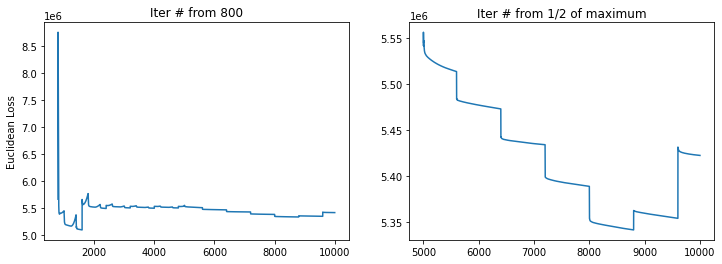

  0%|          | 0/5780 [00:00<?, ?cells/s]

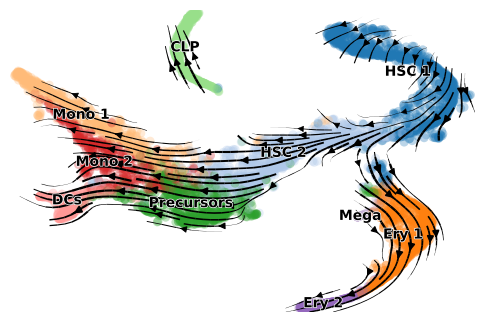

In [5]:
adata = utv.run_model('./data/BoneMarrow/human_cd34_bone_marrow.h5ad', label, config_file=velo_config)
adata.uns['clusters_colors'] = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5']
scv.pl.velocity_embedding_stream(adata, color=adata.uns['label'], dpi=100, title='')

In [7]:
scv.pp.neighbors(adata)
adata_velo = adata[:, adata.var.loc[adata.var['velocity_genes'] == True].index]
exp_metrics["model_dyn"] = utv.evaluate(adata_velo, cluster_edges, label, 'velocity', 'X_tsne')

# Cross-Boundary Direction Correctness (A->B)
{('HSC_1', 'Ery_1'): 0.8677359570085336, ('HSC_1', 'HSC_2'): 0.7155699346392855, ('Ery_1', 'Ery_2'): 0.8316256205110811}
Total Mean: 0.8049771707196335
# In-cluster Coherence
{'CLP': 0.9722802580557224, 'DCs': 0.9804014042400353, 'Ery_1': 0.9810560277189699, 'Ery_2': 0.9851508901230266, 'HSC_1': 0.9738339141922948, 'HSC_2': 0.9756208566544446, 'Mega': 0.9861380266382976, 'Mono_1': 0.9728722765824412, 'Mono_2': 0.975874238188986, 'Precursors': 0.9715477279380238}
Total Mean: 0.9774775620332242


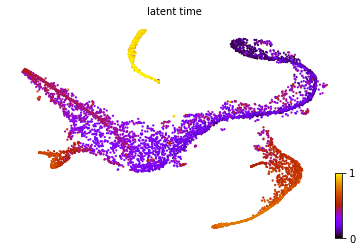

In [10]:
scv.tl.latent_time(adata, min_likelihood=None)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=20)

In [11]:
subvar = adata.var.loc[adata.var['velocity_genes'] == True]
sub = adata[:, subvar.index]

Text(0.5, 1.0, 'Peak Time')

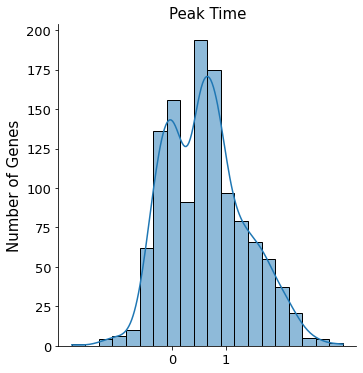

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(sub.var['fit_t0'].values, kde=True, bins=20)
plt.xticks([0, 1], fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Number of Genes', fontsize=15)
plt.title('Peak Time', fontsize=15)

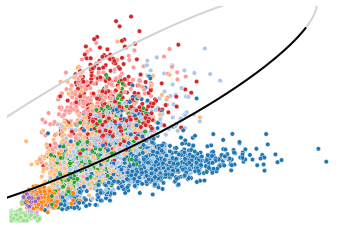

0.38322944506960877 0.6733533919646578 -0.121094674
0.38322944506960877 0.6733533919646578 -0.121094674
0.38322944506960877 0.6733533919646578 -0.121094674


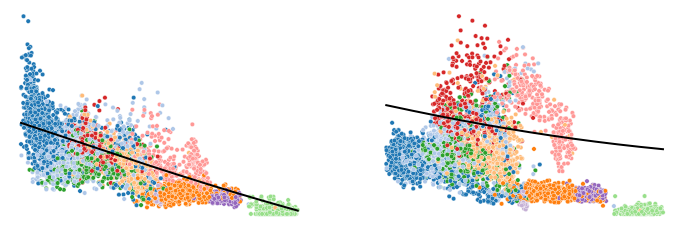

In [16]:
utv.pl.plot_range('CD44', adata, velo_config, 
    show_legend=False, show_ax=False, show_temporal=True, 
    t_left=None, t_right=None, time_metric='latent_time')

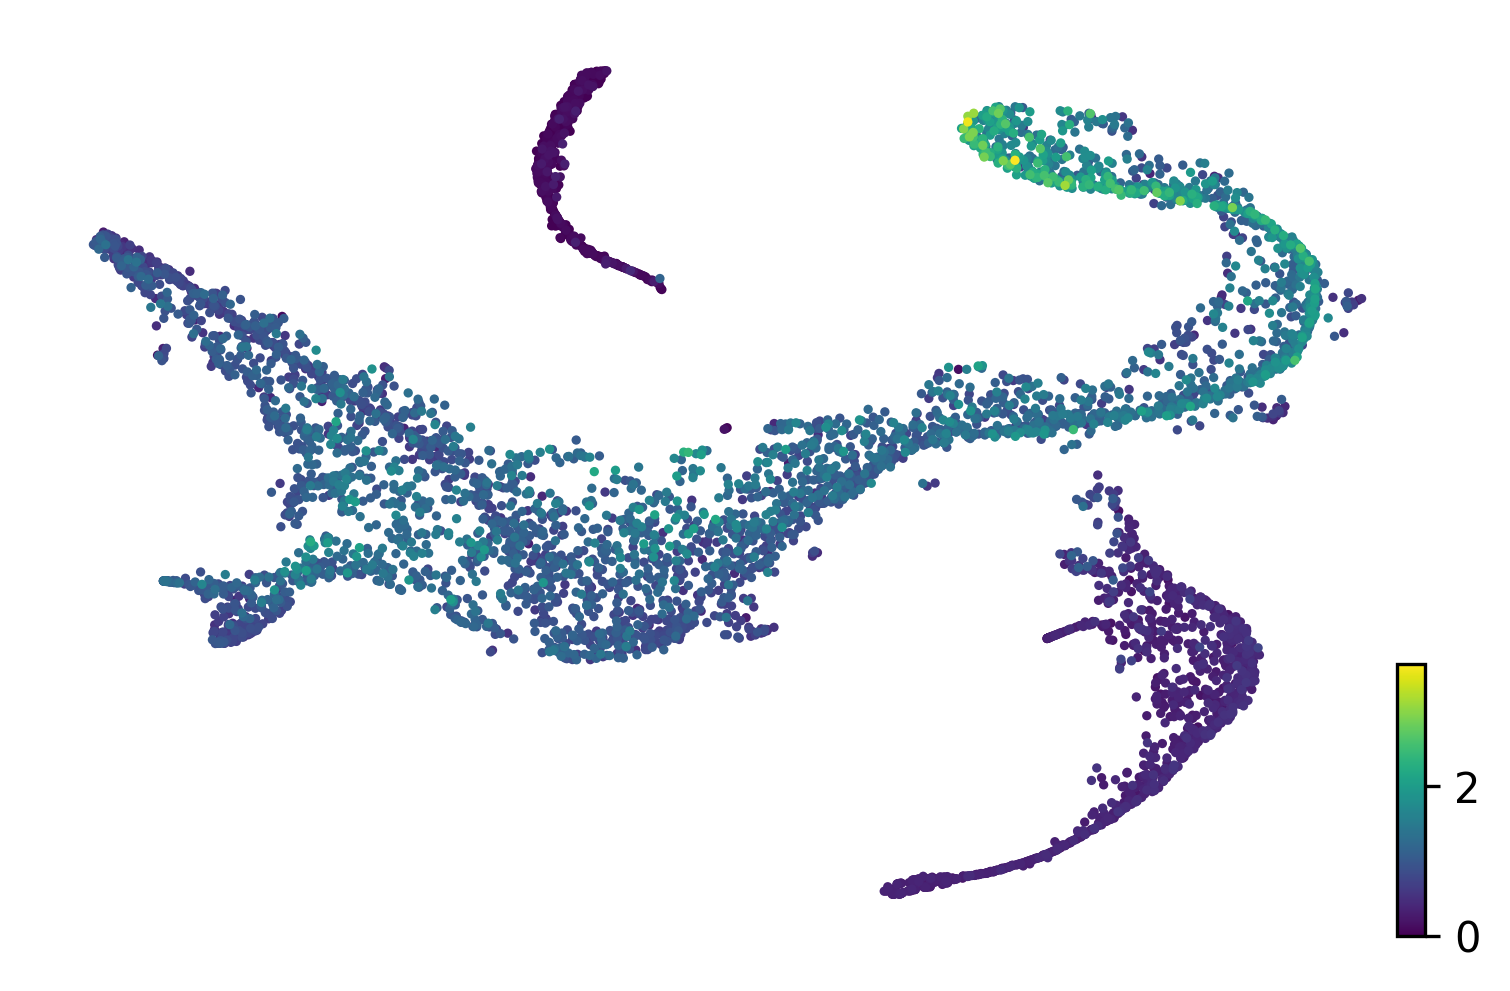

In [17]:
gene_name = 'CD44'
adata.obs['temp'] = adata[:, gene_name].layers['Ms']
scv.pl.scatter(adata, color='temp', color_map='viridis', size=20, dpi=300, title='')

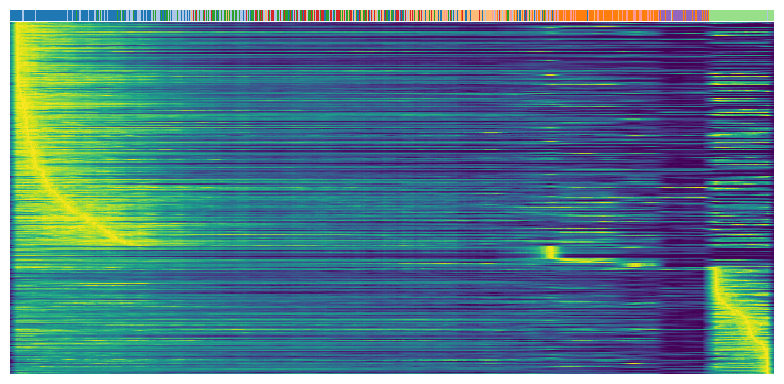

In [18]:
sns.set(rc={"figure.dpi":100})
gene = sub.var.loc[sub.var['fit_t0'] < 0.05].index
scv.pl.heatmap(
    adata, var_names=gene, sortby='latent_time', yticklabels=False,
    col_color=label, n_convolve=100)

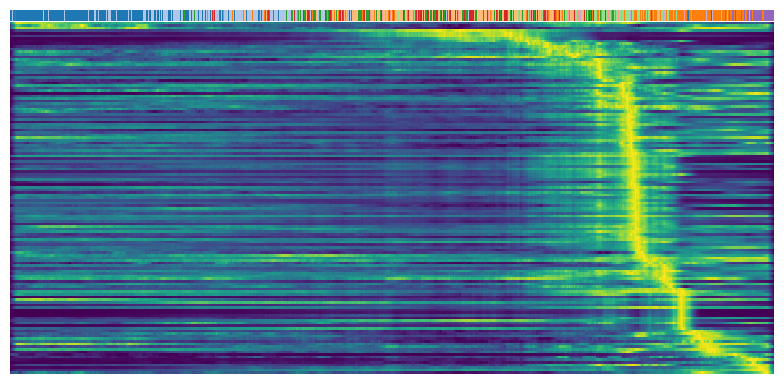

In [19]:
gene = sub.var.loc[sub.var['fit_t0'] > 0.95].index
scv.pl.heatmap(
    adata, var_names=gene, sortby='latent_time', yticklabels=False,
    col_color=label, n_convolve=100)